**Lucca Cerf Costa RA00304770   
Letícia Lopes Bueno RA00297719**

In [1]:
import pandas as pd

In [2]:
''' Montando um dataset baseado em diversas informações sobre alimentação. Todos os dados dos 4 datasets abaixo
são oficiais do Mapeamento de Segurança Alimentar e Nutricional (MapaSAN). Outros estabelecimentos semelhantes podem
existir mas não foram registrados até o momento de coleta dos dados (2018)'''

# Selecionando quantos de cada estabelecimento cada estado tem.
# Banco de Alimentos
df1 = pd.read_csv("Mapasan2018_EPSAN_Banco_de_Alimentos.csv", encoding='latin1', delimiter = ";")
cont1 = df1['v9170'].value_counts().sort_index()

# Cozinha Comunitária
df2 = pd.read_csv("Mapasan2018_EPSAN_Cozinha_Comunitaria.csv", encoding='latin1', delimiter = ";")
cont2 = df2['v9141'].value_counts().sort_index()

# Restaurante Popular
df3 = pd.read_csv("Mapasan2018_EPSAN_Restaurante_Popular.csv", encoding='latin1', delimiter = ";")
cont3 = df3['v9109'].value_counts().sort_index()

# Feira Livre
df4 = pd.read_csv("Mapasan2018_EPSAN_Feira_Livre.csv", encoding='latin1', delimiter = ";")
cont4 = df4['v9966'].value_counts().sort_index()

In [3]:
df_br = pd.read_excel("DadosBr.xlsx")

In [4]:
# Dataset das distribuidoras no Brasil

import pandas as pd
import json

# Supondo que você tenha um arquivo JSON chamado 'dados.json'
with open('dist_brasil.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Criando um DataFrame a partir dos dados
df = pd.DataFrame(data)

# Contando as ocorrências de cada estado
contagem_estados = df['state'].value_counts().sort_index().to_dict()

# Exibindo a contagem
print(contagem_estados)


{'AC': 14, 'AM': 9, 'AP': 1, 'Acre': 78, 'Amazonas': 70, 'BA': 1, 'Bahia': 6, 'Ceará': 5, 'Espírito Santo': 3, 'GO': 24, 'Goiás': 86, 'MS': 3, 'MT': 28, 'Mato Grosso': 162, 'Mato Grosso do Sul': 8, 'Minas Gerais': 13, 'PA': 20, 'PB': 1, 'PE': 1, 'PI': 1, 'PR': 3, 'Paraná': 16, 'Paraíba': 15, 'Pará': 126, 'Pernambuco': 5, 'RO': 5, 'RS': 1, 'Rio Grande do Norte': 4, 'Rio Grande do Sul': 10, 'Rio de Janeiro': 5, 'Rondônia': 121, 'Roraima': 2, 'SC': 2, 'SP': 3, 'Santa Catarina': 4, 'Sergipe': 1, 'São Paulo': 34, 'TO': 24, 'Tocantins': 73}


In [5]:
import pandas as pd

# Criando um DataFrame a partir do dicionário
df = pd.DataFrame(list(contagem_estados.items()), columns=['Estado', 'Valor'])

estados = {'Acre': 'AC', 'Amazonas': 'AM', 'Bahia': 'BA', 'Ceará': 'CE',
                                     'Espírito Santo': 'ES', 'Goiás': 'GO', 'Mato Grosso': 'MT',
                                     'Mato Grosso do Sul': 'MS', 'Minas Gerais': 'MG', 'Paraná': 'PR',
                                     'Paraíba': 'PB', 'Pará': 'PA', 'Pernambuco': 'PE', 'Rio de Janeiro': 'RJ',
                                     'Rio Grande do Norte': 'RN', 'Roraima': 'RR', 'Rondônia': 'RO',
                                     'Rio Grande do Sul': 'RS', 'Sergipe': 'SE', 'Santa Catarina': 'SC',
                                     'São Paulo': 'SP', 'Tocantins': 'TO'}
# Removendo as entradas duplicadas
df['Estado'] = df['Estado'].replace(estados)

# Somando os valores agrupados por estado
resultado = df.groupby('Estado')['Valor'].sum()
# Não consegui achar dados sobre os estados adicionados abaixo
add = pd.Series({'DF':0,'AL':0,'MA':0})
resultado = resultado.combine_first(add)
resultado.sort_index(inplace=True)

In [6]:
# Adicionar a nova coluna ao DataFrame existente
df_br['Distribuidoras de Alimentos'] = df_br['Região'].map(resultado)

In [7]:
df_rodo = pd.read_csv('icm_08_2022.csv', delimiter=';')
# Contar a frequência de cada estado na coluna "UF"
contagem_estados = df_rodo['UF'].value_counts()
# Não consegui achar dados sobre os estados adicionados abaixo
add = pd.Series({'DF':0,'ES':0,'RO':0,'SE':0,'TO':0})
contagem_estados = contagem_estados.combine_first(add)

# Exibir a contagem
contagem_estados.sort_index()

# Adicionar a contagem de estados ao DataFrame df_br
df_br['Danos nas Estradas'] = df_br['Região'].map(contagem_estados)

In [8]:
df_br

,Região,Segurança Alimentar,"Agricultura, pecuária, produção florestal, pesca e aquicultura",Alojamento e alimentação,Quantidade Produzida (t),Distribuidoras de Alimentos,Danos nas Estradas
0,AC,31.0,98,497,1508860,92,18
1,AL,22.2,337,2760,19393575,0,134
2,AM,29.5,189,1661,239851,79,783
3,AP,20.6,56,411,1502827,1,483
4,BA,37.4,2534,12468,20208881,7,4802
5,CE,18.2,1241,7444,2484317,5,2236
6,DF,38.5,267,6552,691998,0,0
7,ES,61.0,647,5681,4360499,3,0
8,GO,45.2,3363,9149,90366042,110,2179
9,MA,22.9,802,2898,5934041,0,2088


Mean Absolute Error: 9.402500000000002


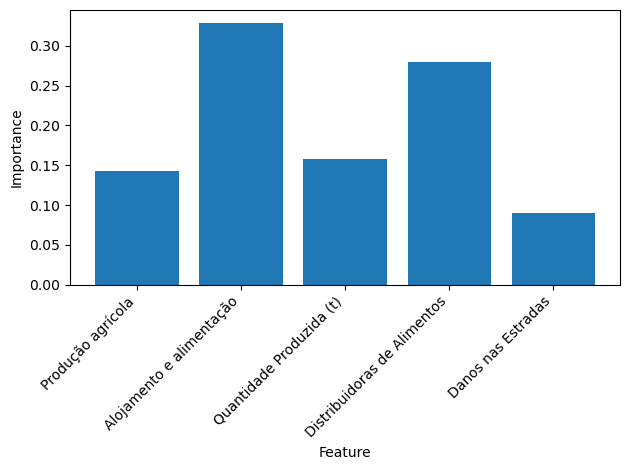

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Renomeando a coluna
df_br.rename(columns={"Agricultura, pecuária, produção florestal, pesca e aquicultura": "Produção agrícola"}, inplace=True)

# Passo 3: Divisão dos Dados
X = df_br.drop(["Região", "Segurança Alimentar"], axis=1)
y = df_br["Segurança Alimentar"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 4: Construção do Modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Passo 6: Avaliação do Modelo
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Passo 7: Análise de Importância de Recursos
feature_importances = model.feature_importances_
features = X.columns

# Ajustando a orientação dos rótulos
plt.bar(features, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')  # Ajuste aqui
plt.tight_layout()  # Para garantir que os rótulos não se sobreponham
plt.show()
